In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# Theme
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_palette(["#117A65", "#2E86C1", "#839192", "#48C9B0", "#1ABC9C", "#2C3E50"])

# Create synthetic dataset
np.random.seed(42)
N = 2500  
start_date = datetime(2023, 1, 1)

categories = ["Food", "Shopping", "Transport", "Bills", "Subscriptions", "Medical"]
rows = []
for i in range(N):
    date = start_date + timedelta(days=np.random.randint(0, 670))
    cat = np.random.choice(categories)
    amount = np.round(np.random.normal(500, 300), 2)
    amount = max(amount, 50.0)
    rows.append([date, cat, amount])

df = pd.DataFrame(rows, columns=["date", "category", "amount"])
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["month_name"] = df["date"].dt.strftime("%b %Y")

df.head()


,date,category,amount,month,month_name
0,2023-04-13,Bills,166.44,4,Apr 2023
1,2024-04-11,Transport,595.67,4,Apr 2024
2,2024-04-03,Subscriptions,973.76,4,Apr 2024
3,2024-10-23,Subscriptions,730.23,10,Oct 2024
4,2023-12-10,Bills,506.67,12,Dec 2023


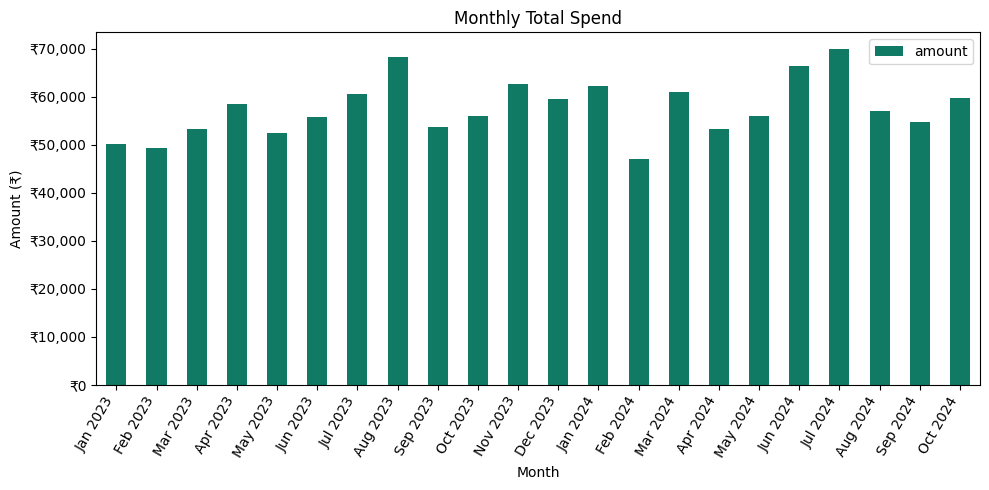

In [3]:
monthly = df.groupby(pd.Grouper(key="date", freq="MS"))["amount"].sum().reset_index()
monthly["month_name"] = monthly["date"].dt.strftime("%b %Y")

ax = monthly.plot(x="month_name", y="amount", kind="bar")
plt.title("Monthly Total Spend")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=60, ha="right")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"₹{x:,.0f}"))
plt.tight_layout()
plt.show()


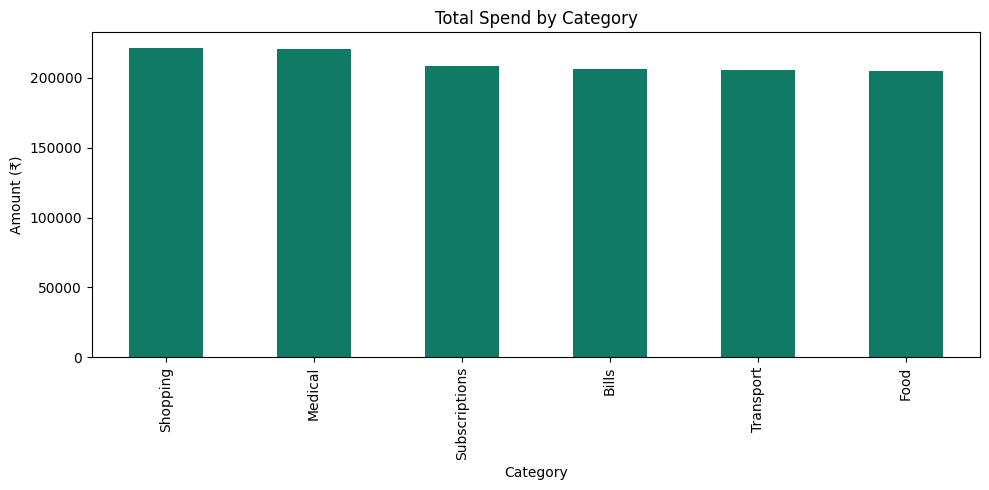

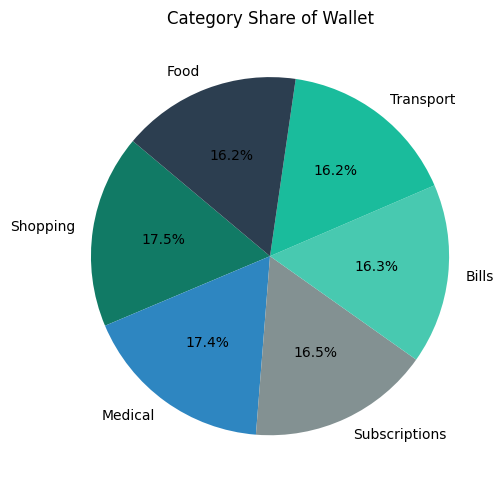

In [4]:
# Total spend per category
cat_spend = df.groupby("category")["amount"].sum().sort_values(ascending=False)

# Bar chart
ax = cat_spend.plot(kind="bar")
plt.title("Total Spend by Category")
plt.xlabel("Category")
plt.ylabel("Amount (₹)")
plt.tight_layout()
plt.show()

# Pie chart: share of wallet
plt.figure()
plt.pie(cat_spend.values, labels=cat_spend.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Share of Wallet")
plt.tight_layout()
plt.show()


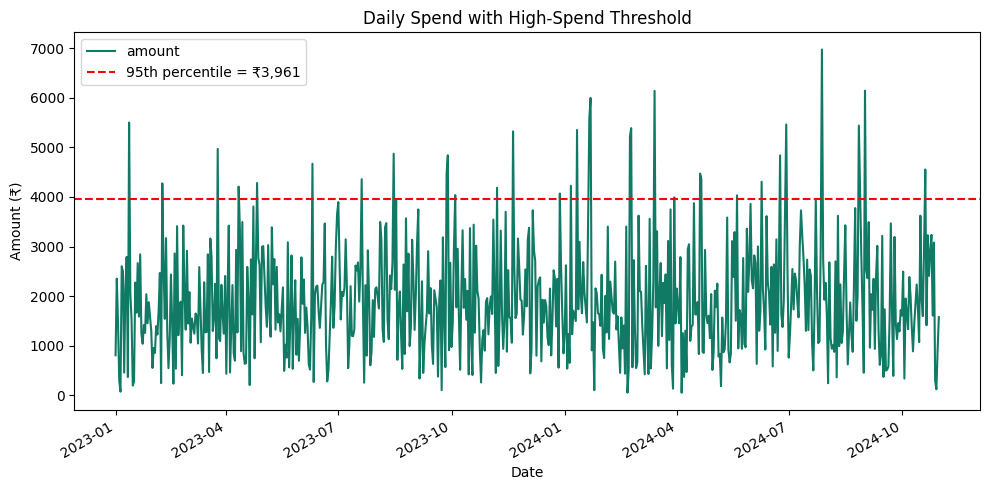

,date,amount
11,2023-01-12,5501.30
38,2023-02-08,4273.75
83,2023-03-25,4970.96
99,2023-04-11,4208.77
114,2023-04-26,4282.93


In [5]:
# Daily total spend
daily = df.groupby("date")["amount"].sum().reset_index()

# Identify top 5% highest spending days
q95 = daily["amount"].quantile(0.95)

# Plot
ax = daily.plot(x="date", y="amount")
plt.axhline(q95, color="red", linestyle="--", label=f"95th percentile = ₹{q95:,.0f}")
plt.title("Daily Spend with High-Spend Threshold")
plt.xlabel("Date")
plt.ylabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.show()

# Show highest spending days as a table
daily[daily["amount"] >= q95].head()


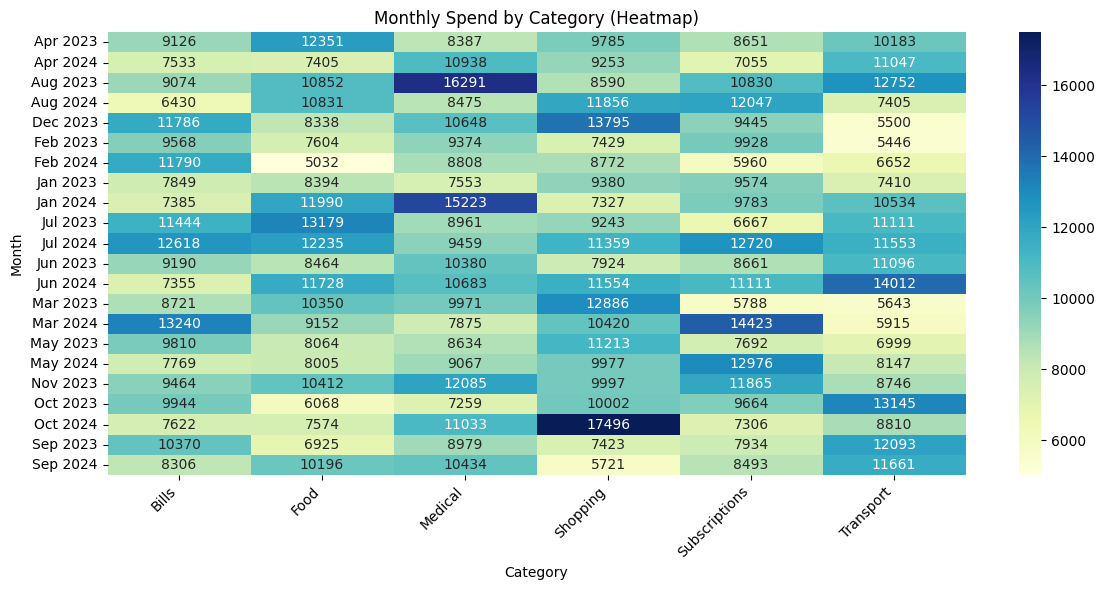

In [6]:
# Category and month pivot table
pivot = df.pivot_table(index="month_name", columns="category", values="amount", aggfunc="sum")

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Spend by Category (Heatmap)")
plt.xlabel("Category")
plt.ylabel("Month")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


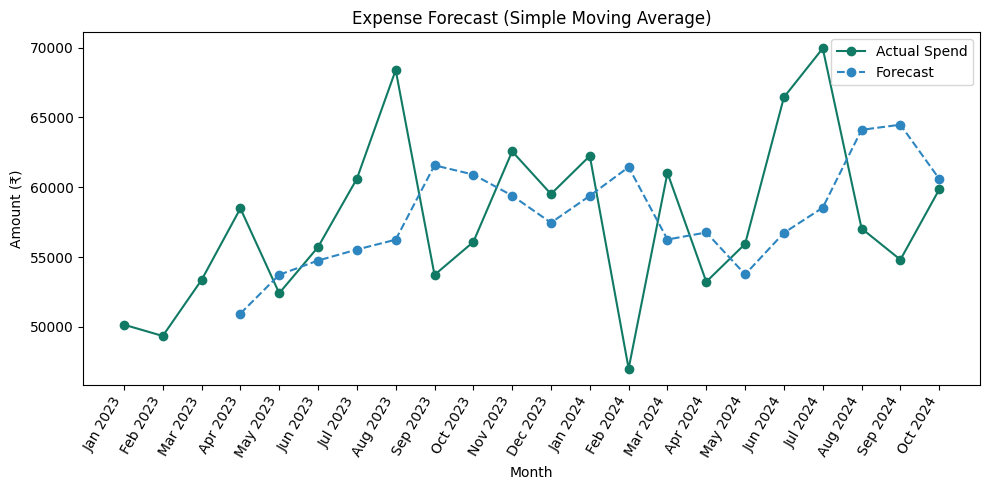

,date,amount,month_name,forecast
17,2024-06-01,66443.50,Jun 2024,56732.530000
18,2024-07-01,69943.73,Jul 2024,58538.453333
19,2024-08-01,57044.32,Aug 2024,64109.263333
20,2024-09-01,54811.76,Sep 2024,64477.183333
21,2024-10-01,59841.31,Oct 2024,60599.936667


In [7]:
# Future Forecast - Simple Moving Average (Next 3 Months)
monthly["forecast"] = monthly["amount"].rolling(window=3).mean().shift(1)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(monthly["month_name"], monthly["amount"], marker='o', label="Actual Spend")
plt.plot(monthly["month_name"], monthly["forecast"], marker='o', linestyle="--", label="Forecast")
plt.title("Expense Forecast (Simple Moving Average)")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=60, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

monthly.tail(5)


🔍 **Key Insights**

1️⃣ **Monthly Spending Trend**

Several peaks observed, indicating occasional high spending periods.

Expenses gradually increased through the year.

2️⃣ **Category-wise Spending**

Food and Shopping contribute the highest share of spend.

Medical & Subscription expenses remain low and consistent.

3️⃣ **High-Spend Days**

A few days show unusually high expenses (above the 95th percentile).

These outliers may represent bulk purchases, emergencies, or events.

4️⃣ **Seasonal / Monthly Pattern**

Certain categories spike in specific months, possibly due to:

Festivals / Holidays (Shopping ↑)

Planned Bills / Annual payments

5️⃣ **Forecasting**

A simple moving average suggests spending may remain high in upcoming months.

Helps in budgeting and financial planning.